# Exploring models to predict new or used

## Set up

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

### Load data

In [3]:
df = pd.read_csv('df_to_model_encoded.csv')
df = df.drop('condition', axis=1)
df

,id,have_seller_contact,have_deal_ids,free_shipping,local_pick_up,have_variations,have_location,have_attributes,dragged_bids_and_visits,good_quality_thumbnail,...,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_auction,buying_mode_buy_it_now,buying_mode_classified,target_condition
0,MLA578052519,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,MLA581565358,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,MLA578780872,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,MLA581877385,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,MLA576112692,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,MLA581735252,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
99996,MLA579045843,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
99997,MLA578170688,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
99998,MLA575062152,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Review data

In [4]:
def plot_correlation_heatmap(dtf, exclude_columns):
    """
    Plots a heatmap showing the correlation between numeric variables in the DataFrame,
    excluding the specified columns.
    
    Parameters:
    dtf (pd.DataFrame): The DataFrame containing the data.
    exclude_columns (list): A list of column names to exclude from the correlation calculation.
    
    Returns:
    None: Displays the correlation heatmap.
    """
    # Set up data to plot
    dtf_corr = dtf.drop(columns=exclude_columns).select_dtypes(include=['float64', 'int64'])
    
    # Calculation corr
    corr_matrix = dtf_corr.corr()

    plt.figure(figsize=(14, 10))
    sns.set(font_scale=1.2) 
    heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 5})
    
    plt.title("Correlation Heatmap", fontsize=12, pad=10)
    plt.xticks(rotation=90, ha='right', fontsize=10)  
    plt.yticks(fontsize=10)  
    plt.show()


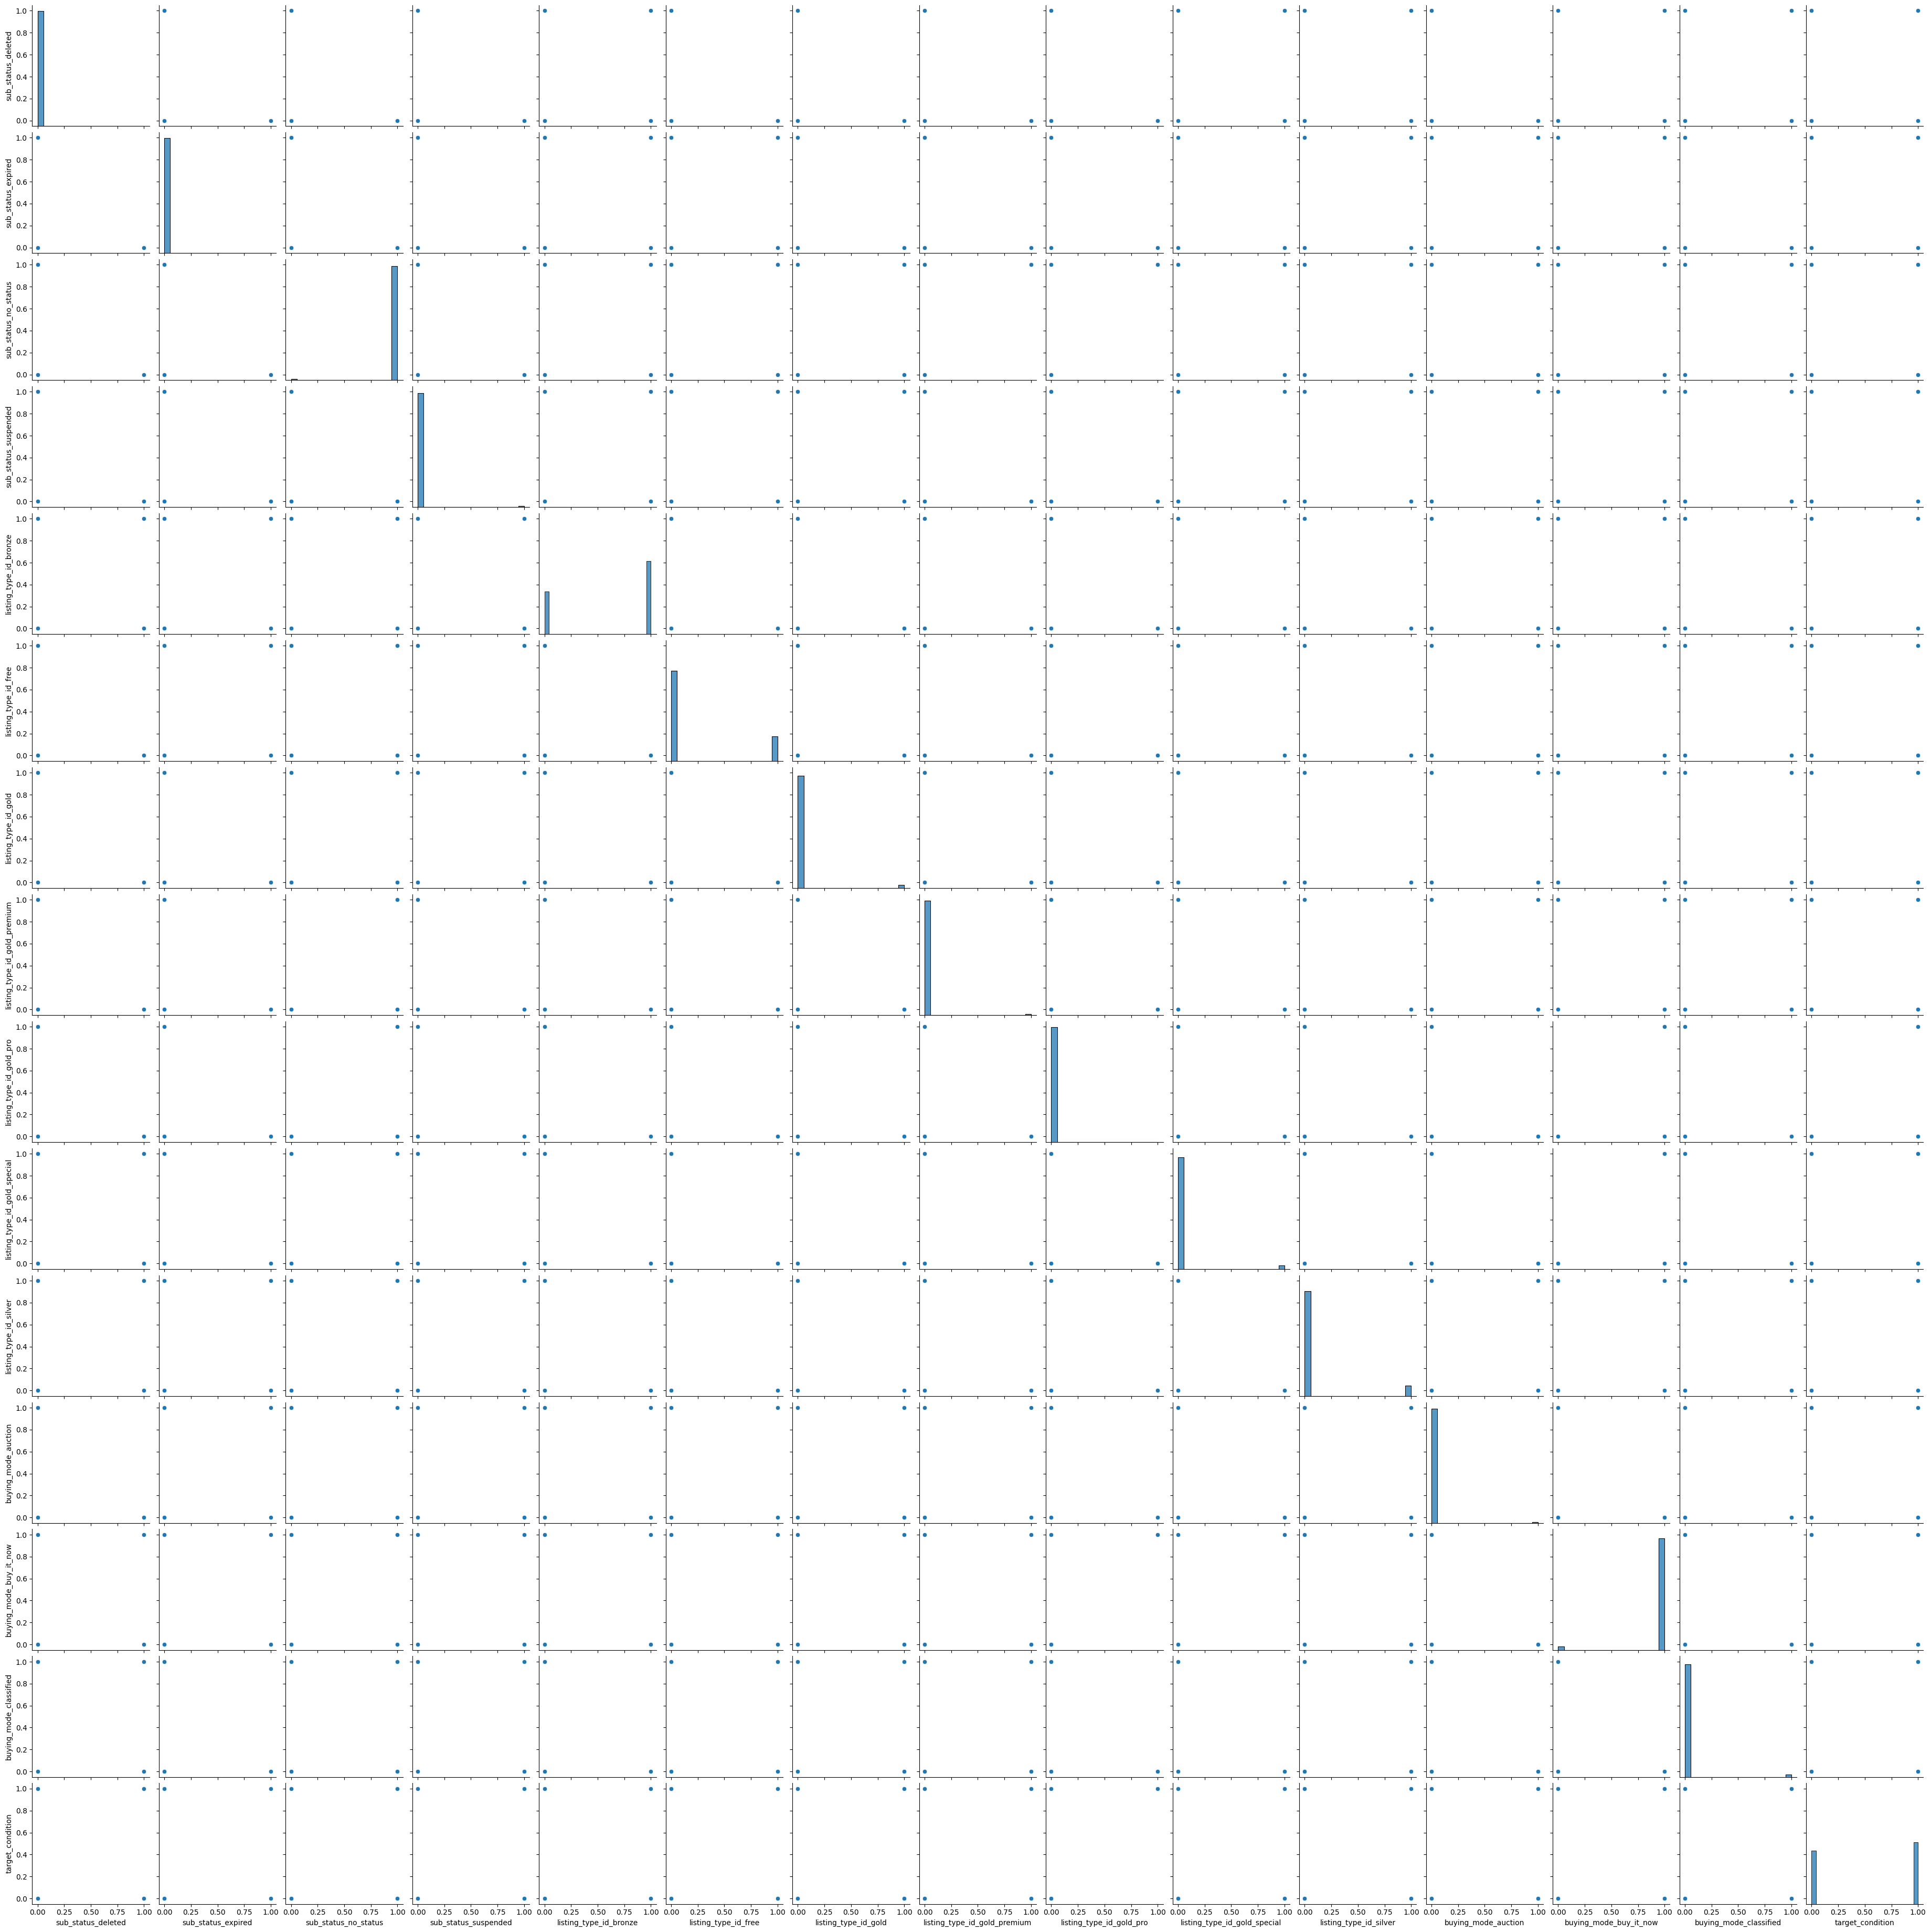

In [5]:
columns_to_check = [
       'sub_status_deleted', 'sub_status_expired',
       'sub_status_no_status', 'sub_status_suspended',
       'listing_type_id_bronze', 'listing_type_id_free',
       'listing_type_id_gold', 'listing_type_id_gold_premium',
       'listing_type_id_gold_pro', 'listing_type_id_gold_special',
       'listing_type_id_silver', 'buying_mode_auction',
       'buying_mode_buy_it_now', 'buying_mode_classified', 'target_condition']

sns.pairplot(df[columns_to_check])
plt.show()

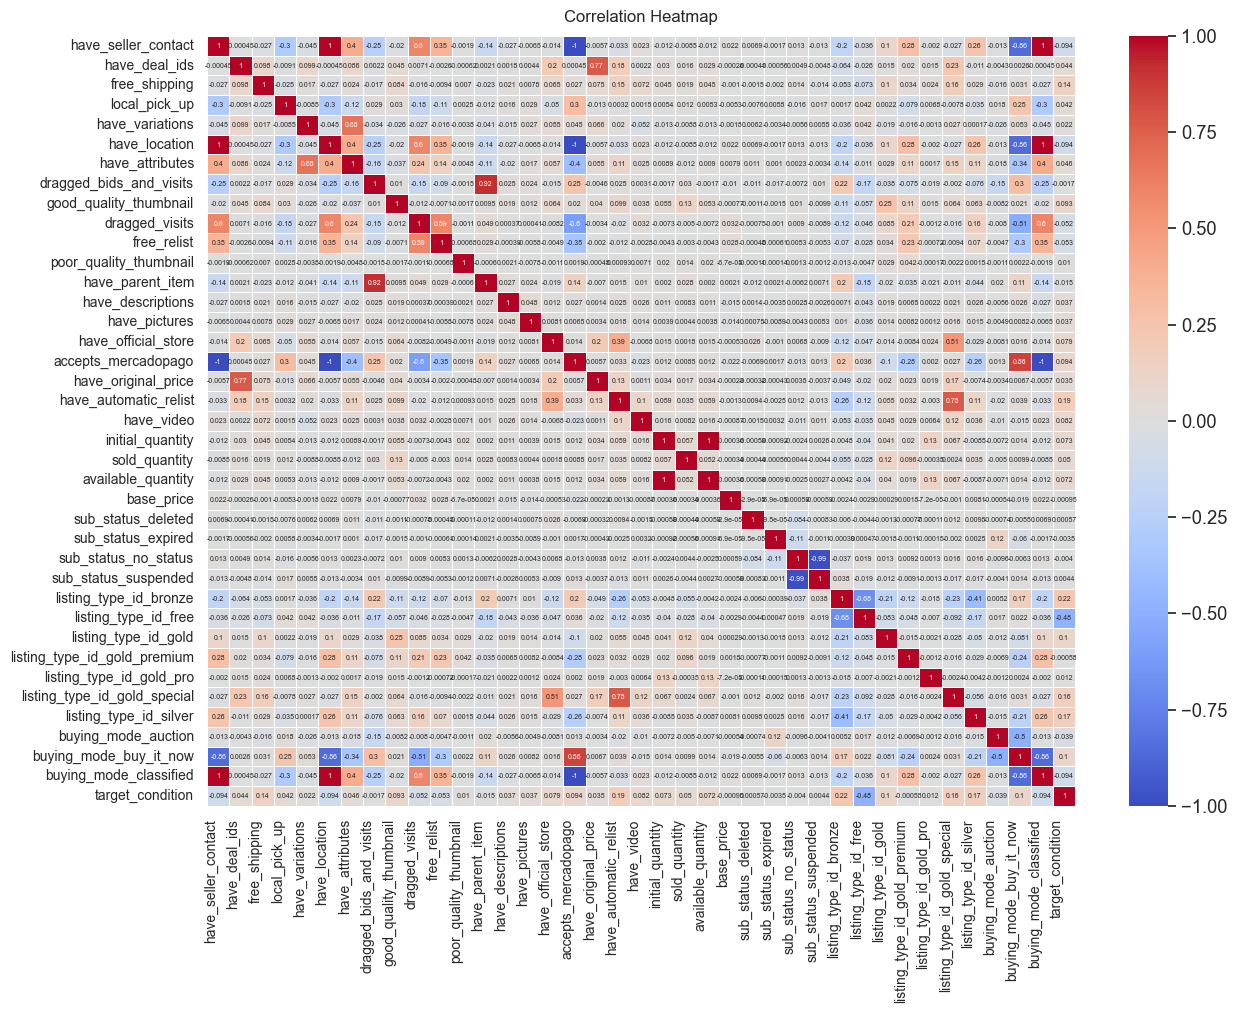

In [49]:
exclude_columns = ['id']
plot_correlation_heatmap(df, exclude_columns)

# Logistic Regression

In [6]:
# Libs
from sklearn.linear_model import LogisticRegression

In [7]:
X = df.drop(columns=['id', 'target_condition'])
y = df['target_condition']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=10000, random_state=42)

lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.7466
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.90      0.77      4604
           1       0.88      0.61      0.72      5396

    accuracy                           0.75     10000
   macro avg       0.77      0.76      0.74     10000
weighted avg       0.78      0.75      0.74     10000



## Logistic Regression - StandardScaler data

In [8]:
X = df.drop(columns=['id', 'target_condition'])  
y = df['target_condition']

# num cols : scaling
numeric_cols = ['initial_quantity', 'sold_quantity', 'available_quantity', 'base_price']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])  # Escalar los datos numéricos


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=10000, random_state=42)

lrs_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, solver='lbfgs')
lrs_model.fit(X_train, y_train)

# Predictions
y_pred = lrs_model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.7771
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.88      0.78      4604
           1       0.87      0.69      0.77      5396

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



                         Feature  Coefficient  Absolute Coefficient
21                 sold_quantity    15.297592             15.297592
22            available_quantity     5.655807              5.655807
20              initial_quantity     4.433009              4.433009
29          listing_type_id_free    -3.368423              3.368423
10                   free_relist    -2.033615              2.033615
33  listing_type_id_gold_special     1.960378              1.960378
2                  free_shipping     1.897252              1.897252
6                have_attributes     1.358172              1.358172
19                    have_video     0.957601              0.957601
36        buying_mode_buy_it_now     0.910741              0.910741
24            sub_status_deleted    -0.826972              0.826972
16           accepts_mercadopago     0.822400              0.822400
34        listing_type_id_silver     0.794534              0.794534
37        buying_mode_classified    -0.794045   

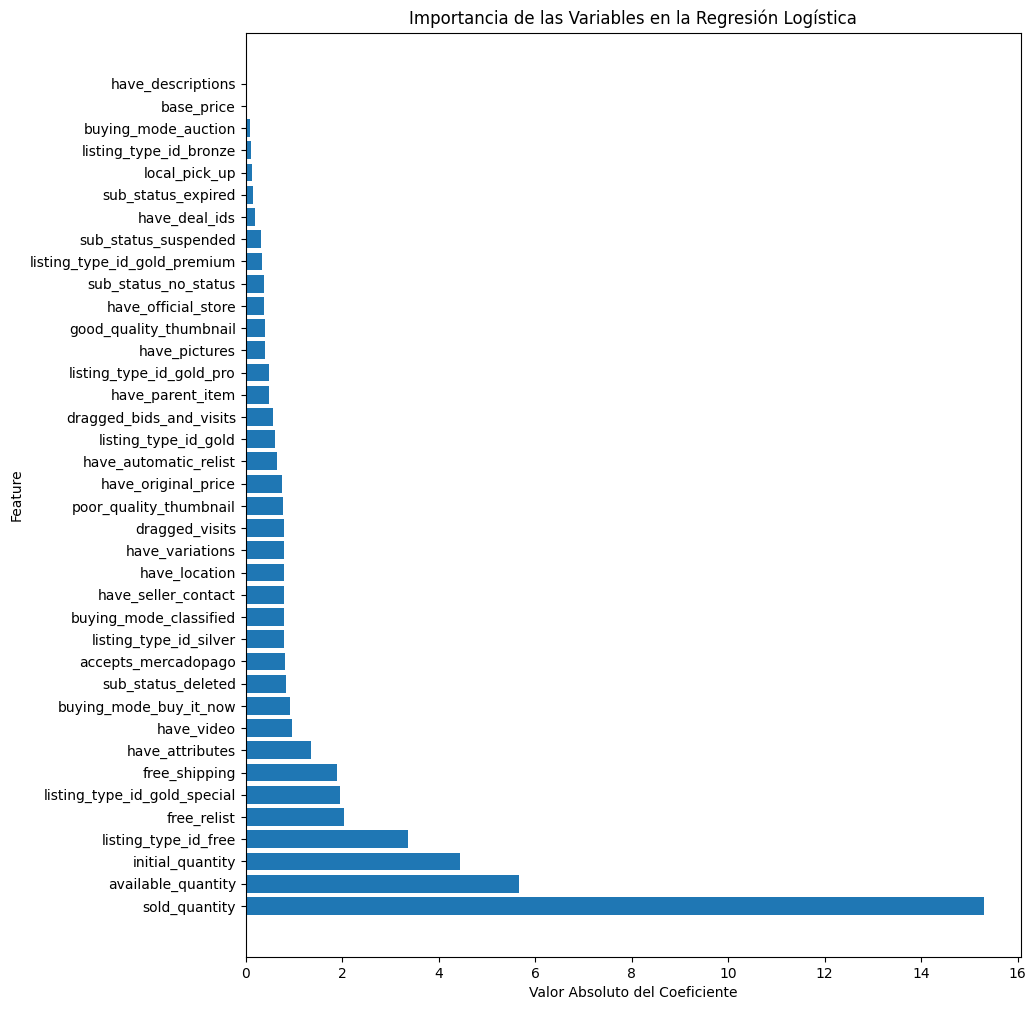

In [9]:
coefficients = lrs_model.coef_[0]  

coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Absolute Coefficient', ascending=False)
print(coeff_df)

plt.figure(figsize=(10, 12))
plt.barh(coeff_df['Feature'], coeff_df['Absolute Coefficient'])
plt.title('Importancia de las Variables en la Regresión Logística')
plt.xlabel('Valor Absoluto del Coeficiente')
plt.ylabel('Feature')
plt.show()

# RandomForest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
X = df.drop(columns=['id', 'target_condition'])  
y = df['target_condition']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=10000, random_state=42)

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)

# Prediction
y_pred = rf_model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.831
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      4604
           1       0.88      0.79      0.83      5396

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



# Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
X = df.drop(columns=['id', 'target_condition'])  
y = df['target_condition']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=10000, random_state=42)

model_gb = GradientBoostingClassifier(random_state=42, n_estimators=150, learning_rate=0.1, max_depth=7, min_samples_split=10, subsample=0.9)
model_gb.fit(X_train, y_train)

# Predictions
y_pred_gb = model_gb.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred_gb))
print("Classification Report:\n", classification_report(y_val, y_pred_gb))

Accuracy: 0.843
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      4604
           1       0.86      0.85      0.85      5396

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## Gradiend Boosting - Gridsearch

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
X = df.drop(columns=['id', 'target_condition'])  
y = df['target_condition']

# Scaling
numeric_cols = ['initial_quantity', 'sold_quantity', 'available_quantity', 'base_price']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols]) 


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=10000, random_state=42)


model_gb = GradientBoostingClassifier(random_state=42)

# Gridsearch definitions
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de estimadores (árboles)
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'subsample': [0.8, 0.9, 1.0]  # Fracción de muestras a utilizar para entrenar cada árbol
}

grid_search = GridSearchCV(estimator=model_gb, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)


grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predictions
y_pred_gb = best_model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred_gb))
print("Classification Report:\n", classification_report(y_val, y_pred_gb))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 150, 'subsample': 0.9}
Accuracy: 0.8379
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      4604
           1       0.86      0.84      0.85      5396

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# Catboost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [32]:
X = df.drop(columns=['id', 'target_condition'])  
y = df['target_condition']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=10000, random_state=42)


model_catboost = CatBoostClassifier(random_state=42, silent=True)  
model_catboost.fit(X_train, y_train)

# Predictions
y_pred_catboost = model_catboost.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred_catboost))
print("Classification Report:\n", classification_report(y_val, y_pred_catboost))

Accuracy: 0.8435
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      4604
           1       0.86      0.85      0.85      5396

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# SMV

In [16]:
from sklearn.svm import SVC

In [33]:
X = df.drop(columns=['id', 'target_condition']) 
y = df['target_condition']

# Scaling
numeric_cols = ['initial_quantity', 'sold_quantity', 'available_quantity', 'base_price']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])  


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=10000, random_state=42)

model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.7342
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.89      0.76      4604
           1       0.87      0.60      0.71      5396

    accuracy                           0.73     10000
   macro avg       0.76      0.75      0.73     10000
weighted avg       0.77      0.73      0.73     10000



# Neural Network MLP classifier

In [17]:
from sklearn.neural_network import MLPClassifier

In [34]:
X = df.drop(columns=['id', 'target_condition'])  
y = df['target_condition']

# Scaling
numeric_cols = ['initial_quantity', 'sold_quantity', 'available_quantity', 'base_price']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])  


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=10000, random_state=42)

n_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
n_model.fit(X_train, y_train)

# Predictions
y_pred = n_model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8104
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81      4604
           1       0.88      0.76      0.81      5396

    accuracy                           0.81     10000
   macro avg       0.81      0.82      0.81     10000
weighted avg       0.82      0.81      0.81     10000



# Resume

In [18]:
data = {
    'Model': [
        'Logistic Regression', 
        'Random Forest', 
        'SVM', 
        'GradientBoosting', 
        'CatBoost', 
        'Neural Network MLP Class'
    ],
    'Accuracy': [
        0.779, 
        0.831, 
        0.734, 
        0.8379, 
        0.8435, 
        0.810
    ],
    'F1 score': [
        0.78, 
        0.83, 
        0.73, 
        0.83, 
        0.84, 
        0.81
    ]
}

df_resume = pd.DataFrame(data)
df_resume

,Model,Accuracy,F1 score
0,Logistic Regression,0.7790,0.78
1,Random Forest,0.8310,0.83
2,SVM,0.7340,0.73
3,GradientBoosting,0.8379,0.83
4,CatBoost,0.8435,0.84
5,Neural Network MLP Class,0.8100,0.81


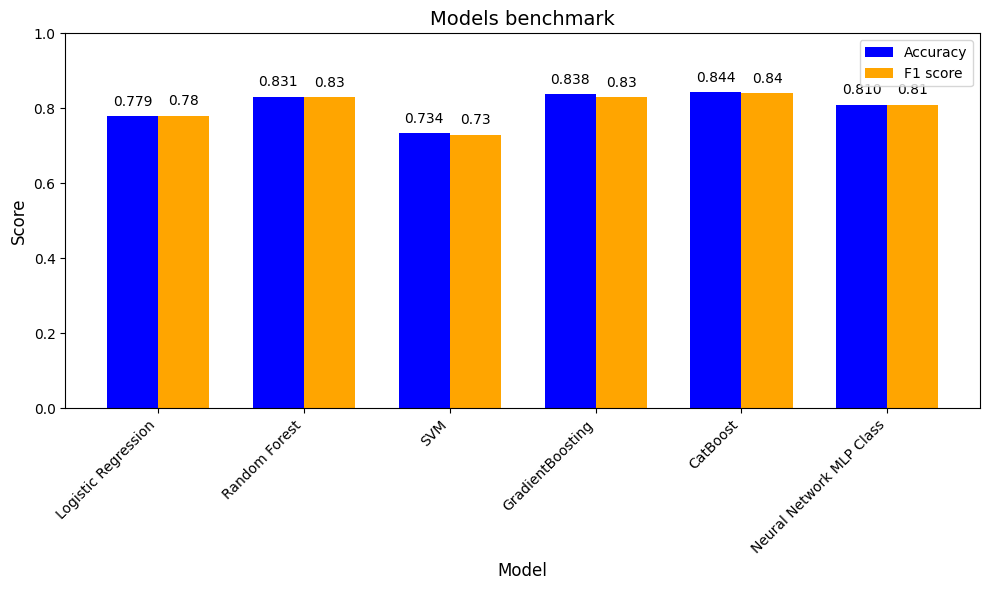

In [25]:
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(df_resume))
bars_accuracy = plt.bar(index, df_resume['Accuracy'], bar_width, label='Accuracy', color='blue')
bars_f1 =plt.bar([i + bar_width for i in index], df_resume['F1 score'], bar_width, label='F1 score', color='orange')


plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Models benchmark', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], df_resume['Model'], rotation=45, ha='right')
plt.ylim(0, 1)

for bar in bars_accuracy:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom')

for bar in bars_f1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()